In [1]:
# Import das Bibliotecas:
import numpy as np
import sys
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!
import prism, noise, plot_3D, auxiliars, salve_doc

In [2]:
data = pd.read_table('data.txt', sep =' ')

In [3]:
anomalyref = data['Total-Field Anomaly(nT)']
anomalyref = np.reshape(np.array(anomalyref), (100,100))

Xref = data['North(m)']
Xref = np.reshape(np.array(Xref), (100,100))

Yref = data['East(m)']
Yref = np.reshape(np.array(Yref), (100,100))

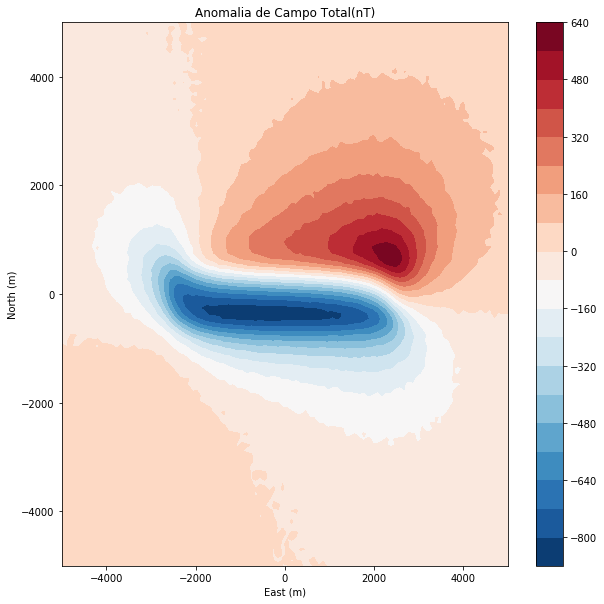

In [4]:
# graficos
plt.close('all')
plt.figure(figsize=(10,10))
#******************************************************
plt.contourf(Yref, Xref, anomalyref, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total(nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
#corpo, = plt.plot(ys1,xs1,'k-*', label = 'Extensão do Dique')
#plt.plot(ys2,xs2,'k-')
#plt.plot(ys3,xs3,'m-')
#arrow = plt.arrow(2000.0, 0.0, 4500.0, 0.0, width=250, length_includes_head = True, color = 'k')
#first_legend = plt.legend(handles=[corpo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, corpo], ['Direção de mergulho', 'Extensão do Dique'], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.colorbar()
#plt.savefig('teste_100_40000_D10.png', format='png')
plt.show()

## Questões
### 1) Qual é a direções do Campo Principal na região do levantamento?
###  R: Falta de informação sobre o levantamento (data, hora) para a o Cálculo do campo Principal

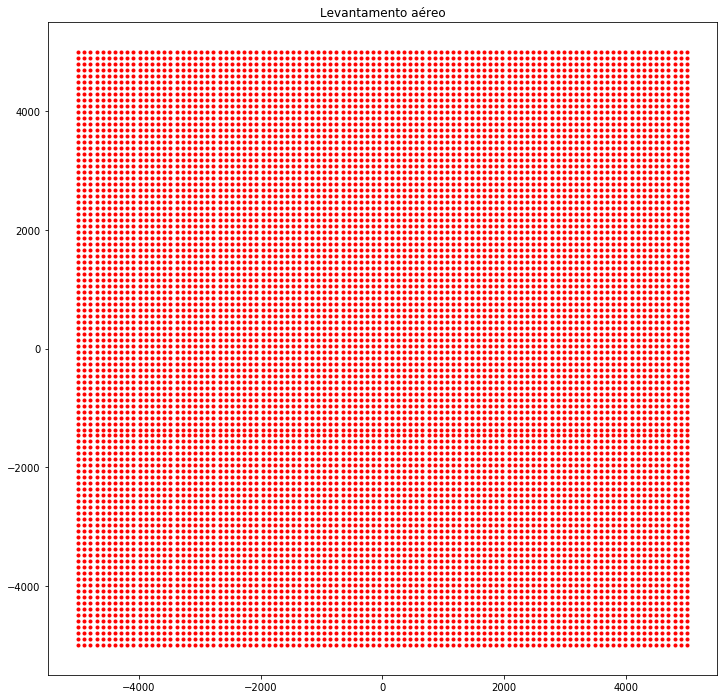

In [5]:
nx = 100 # n de observacoes na direcao x
ny = 100 # n de observacoes na direcao y
size = (nx, ny)

xmin = -5000.0 # metros
xmax = +5000.0 # metros
ymin = -5000.0 # metros
ymax = +5000.0 # metros
z = -150.0 #altura de voo, (com Z constante) em metros

dicionario = {'nx': nx,
                  'ny': ny,
                  'xmin': xmin,
                  'xmax': xmax,
                  'ymin': ymin,
                  'ymax': ymax,
                  'z': z,
                  'color': '.r'}

x, y, X, Y, Z = plot_3D.create_aquisicao(dicionario)

In [71]:
# coordenadas dos vertices (corners) do prisma, em metros:
x1,x2  = (-500.0, 950.0) 
y1,y2  = (-1950.0, 1950.0)
z1,z2  = (320.0, 580.0)   # z eh positivo para baixo!
deltaz = 200.0
deltay = 1450.0
incl = 'negativo'

dic = {'n': 1,
       'x': [x1, x2],
       'y': [y1, y2],
       'z': [z1, z2],
       'deltay': deltay,
       'deltaz': deltaz,
       'incl': 'positivo'}

pointx, pointy, pointz = plot_3D.creat_point(dic)
print(pointx, pointy, pointz)

[-500.0, 950.0] [-1950.0, 1950.0] [320.0, 580.0]


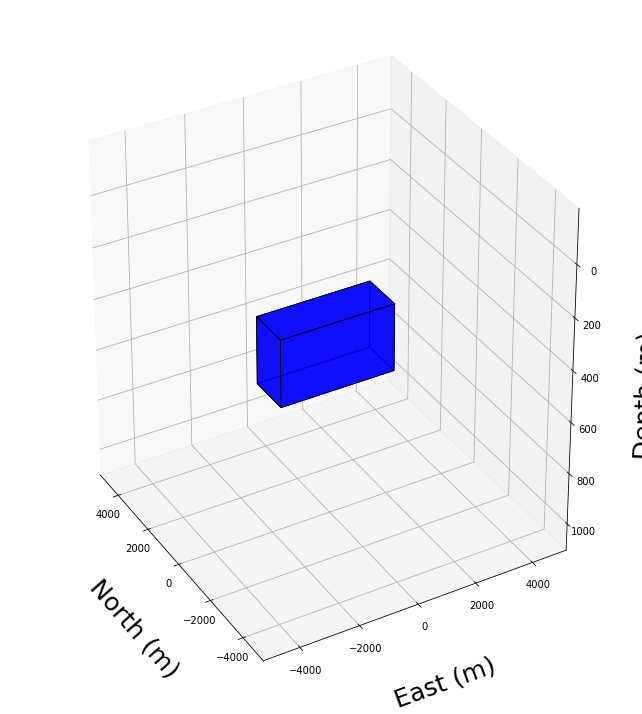

In [72]:
dic1 = {'x': [pointx[0], pointx[1]],
        'y': [pointy[0], pointy[1]],
        'z': [pointz[0], pointz[1]]}
'''
dic2 = {'x': [pointx[2], pointx[3]],
        'y': [pointy[2], pointy[3]],
        'z': [pointz[2], pointz[3]]}

dic3 = {'x': [pointx[4], pointx[5]],
        'y': [pointy[4], pointy[5]],
        'z': [pointz[4], pointz[5]]}
'''
#----------------------------------------------------------------------------------------------------#
vert1 =  plot_3D.vert_point(dic1)
#vert2 =  plot_3D.vert_point(dic2)
#vert3 =  plot_3D.vert_point(dic3)
#----------------------------------------------------------------------------------------------------#
color = 'b'
size = [9, 10]
view = [210, 30]
#----------------------------------------------------------------------------------------------------#
prism_1 = plot_3D.plot_prism(vert1, color)
#prism_2 = plot_3D.plot_prism(vert2, color)
#prism_3 = plot_3D.plot_prism(vert3, color)
#----------------------------------------------------------------------------------------------------#
prisma = {'n': 1,
         'prisma': [prism_1]}

plot_3D.plot_obs_3d(prisma, size, view, x, y, pointz)

In [73]:
inc = -45.0    # inclinacao do campo principal em graus
dec = 25.0      # declinacao do campo principal em graus
Mi  = 9.0 # intensidade da magnetizacao em A/m
Mi2 = 10.0


# Campo principal variando com as posicao F(X,Y):
#F = Fi + 0.013*X + 0.08*Y # nT

# Propriedades magneticas Refinal
I = -23.0 # magnetizacao puramente induzida
D = 45.0 



fonte_crustal_mag1 = [pointx[0], pointx[1], 
                     pointy[0], pointy[1],
                     pointz[0], pointz[1], Mi]
'''
fonte_crustal_mag2 = [pointx[2], pointx[3], 
                     pointy[2], pointy[3],
                     pointz[2], pointz[3], Mi2]


fonte_crustal_mag3 = [pointx[4], pointx[5], 
                     pointy[4], pointy[5],
                     pointz[4], pointz[5], Mi3]
'''

'\nfonte_crustal_mag2 = [pointx[2], pointx[3], \n                     pointy[2], pointy[3],\n                     pointz[2], pointz[3], Mi2]\n\n\nfonte_crustal_mag3 = [pointx[4], pointx[5], \n                     pointy[4], pointy[5],\n                     pointz[4], pointz[5], Mi3]\n'

In [74]:
tfa1 = prism.prism_tf(X, Y,z, fonte_crustal_mag1, I, D, inc, dec)
#tfa2 = prism.prism_tf(X, Y,z, fonte_crustal_mag2, I, D, inc, dec)
#tfa3 = prism.prism_tf(Y, X,z, fonte_crustal_mag3, I, D, inc, dec)

tfa_final = tfa1 #+ tfa2
'''
Etapa só é feita na modelagem direta para produzir os dados sintéticos (na inversão não utiliza o ruído)
mi = 50.0
sigma = 7.1
tfa_final1 = auxiliars.noise_normal_dist(tfa_final, mi, sigma)
'''

'\nEtapa só é feita na modelagem direta para produzir os dados sintéticos (na inversão não utiliza o ruído)\nmi = 50.0\nsigma = 7.1\ntfa_final1 = auxiliars.noise_normal_dist(tfa_final, mi, sigma)\n'

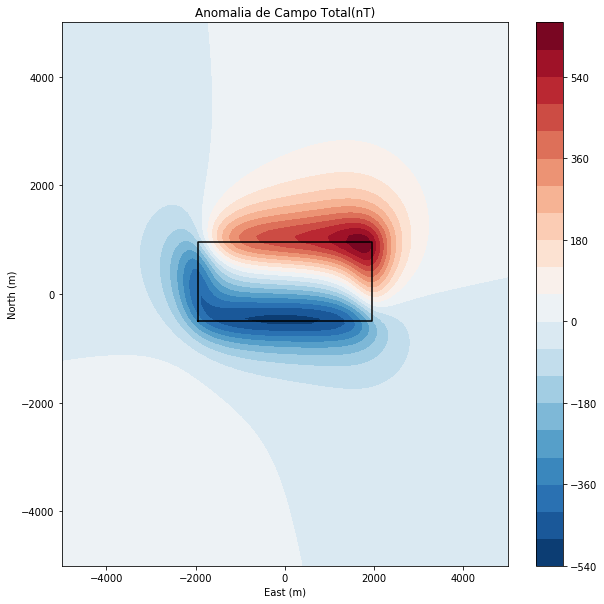

In [75]:
#xs1 = [pointx[0], pointx[0], pointx[5], pointx[5], pointx[0]]

#ys1 = [pointy[0], pointy[5], pointy[5], pointy[0], pointy[0]]

#origin = [[np.absolute(pointx[0] + pointx[5])], [[np.absolute(pointy[0] + pointy[5])]]]
#ponta = [[pointx[5]], [pointy[5]]]

#print(ponta)

xs1 = [pointx[0], pointx[0], pointx[1], pointx[1], pointx[0]]
#xs2 = [pointx[2], pointx[2], pointx[3], pointx[3], pointx[2]]

ys1 = [pointy[0], pointy[1], pointy[1], pointy[0], pointy[0]]
#ys2 = [pointy[2], pointy[3], pointy[3], pointy[2], pointy[2]]
# graficos
plt.close('all')
plt.figure(figsize=(10,10))
#******************************************************
plt.contourf(Y, X, tfa_final, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total(nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.plot(ys1,xs1,'k-')
#plt.plot(ys2,xs2,'k-')
#corpo, = plt.plot(ys1,xs1,'k-*', label = 'Extensão do Dique')
#arrow = plt.arrow(2000.0, 0.0, 4500.0, 0.0, width=250, length_includes_head = True, color = 'k')
#first_legend = plt.legend(handles=[corpo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, corpo], ['Direção de mergulho', 'Extensão do Dique'], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.colorbar()
#plt.savefig('teste_100_40000_D10.png', format='png')
plt.show()


In [55]:
std = np.std(anomalyref)
dif = (anomalyref - tfa_final)**2 / (std**2)

rms = np.sum(dif) / len(dif)
#print(std)
print(rms)

114.25775943494746


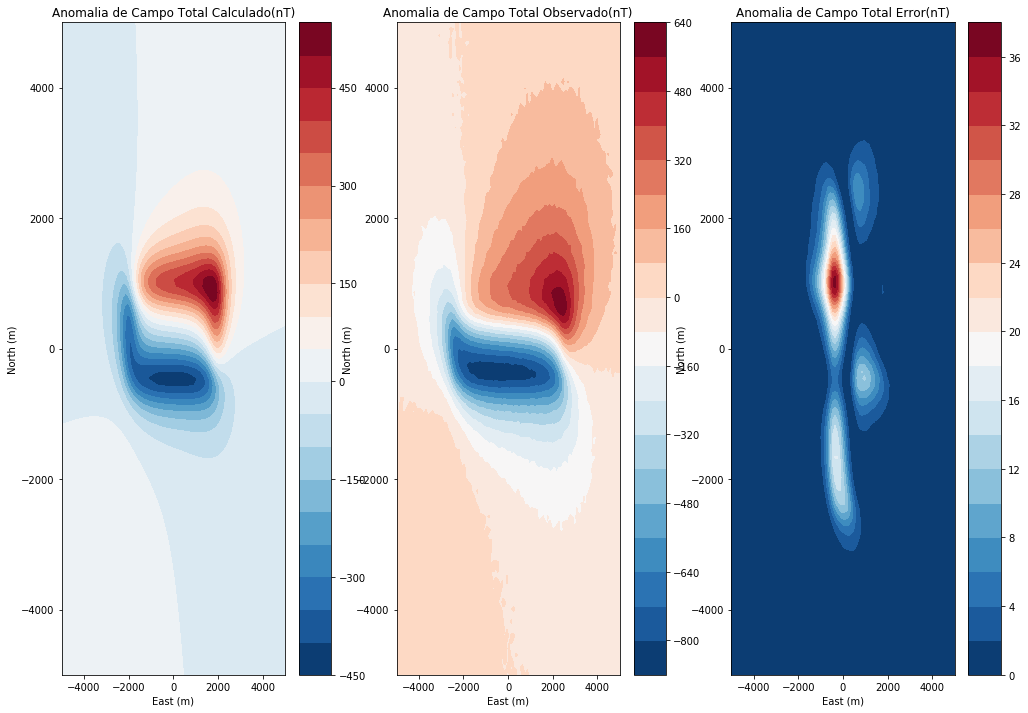

In [34]:
# graficos
plt.close('all')
plt.figure(figsize=(17,12))
#******************************************************
plt.subplot(1,3,1)
plt.contourf(Y, X, tfa_final, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total Calculado(nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.colorbar()
#******************************************************
plt.subplot(1,3,2)
plt.contourf(Yref, Xref, anomalyref, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total Observado(nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.colorbar()
#******************************************************
plt.subplot(1,3,3)
plt.contourf(Y, X, dif, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total Error(nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.colorbar()

plt.show()